# Case Study

In [1]:
import matplotlib.pyplot as plt

import andes
import ams

In [2]:
%matplotlib inline

In [3]:
andes.config_logger(stream_level=30)
ams.config_logger(stream_level=30)

In [4]:
!andes misc --version

Python  3.12.0
andes   1.9.3.post46+g0183fc24
numpy   2.0.2
kvxopt  1.3.2.1
sympy   1.13.3
scipy   1.13.1
pandas  2.2.2
numba   0.60.0


In [5]:
opf_case = './ACTIVSg200/IL200_opf.xlsx'
sp1 = ams.load(opf_case,
               setup=True, no_output=True,
               default_config=True)
sp2 = ams.load(opf_case,
               setup=True, no_output=True,
               default_config=True)
sp3 = ams.load(opf_case,
              setup=True, no_output=True,
              default_config=True)

s1 = sp1.to_andes(addfile='./ACTIVSg200/IL200_dyn_base.xlsx',
                  setup=False, no_output=True,
                  default_config=True)
s2 = sp2.to_andes(addfile='./ACTIVSg200/IL200_dyn_gv.xlsx',
                  setup=False, no_output=True,
                  default_config=True)
s3 = sp3.to_andes(addfile='./ACTIVSg200/IL200_dyn_ts.xlsx',
                  setup=False, no_output=True,
                  default_config=True)

for ss in [s1, s2, s3]:
    # add a Alter device to set load increase
    ss.add(model='Alter',
           param_dict=dict(t=1, model='PQ', dev='PQ_1', src='Ppf',
                           attr='v', method='+', amount=0.05))
    ss.add(model='Alter',
           param_dict=dict(t=1, model='PQ', dev='PQ_2', src='Ppf',
                           attr='v', method='+', amount=0.1))
    ss.add(model='Alter',
           param_dict=dict(t=1, model='PQ', dev='PQ_3', src='Ppf',
                           attr='v', method='+', amount=0.1))

    ss.setup()

Following PFlow models in addfile will be overwritten: <Bus>, <PQ>, <PV>, <Slack>, <Shunt>, <Line>, <Area>
<PQ> has different number of rows in addfile.
AMS system 0x10dfa30b0 is linked to the ANDES system 0x339031d60.
Following PFlow models in addfile will be overwritten: <Bus>, <PQ>, <PV>, <Slack>, <Shunt>, <Line>, <Area>
<PQ> has different number of rows in addfile.
AMS system 0x3392a7980 is linked to the ANDES system 0x3390521e0.
Following PFlow models in addfile will be overwritten: <Bus>, <PQ>, <PV>, <Slack>, <Shunt>, <Line>, <Area>
<PQ> has different number of rows in addfile.
AMS system 0x339221130 is linked to the ANDES system 0x33afbe3f0.


In [6]:
for ss in [sp1, sp2, sp3]:
    ss.DCOPF.run(solver='CLARABEL')
    ss.DCOPF.dc2ac()

Building system matrices
Parsing OModel for <DCOPF>
Evaluating OModel for <DCOPF>
Finalizing OModel for <DCOPF>
<DCOPF> solved as optimal in 0.0176 seconds, converged in 12 iterations with CLARABEL.
Parsing OModel for <ACOPF>
Evaluating OModel for <ACOPF>
Finalizing OModel for <ACOPF>
<ACOPF> solved in 0.4209 seconds, converged in 20 iterations with PYPOWER-PIPS.
<DCOPF> converted to AC.
Building system matrices
Parsing OModel for <DCOPF>
Evaluating OModel for <DCOPF>
Finalizing OModel for <DCOPF>
<DCOPF> solved as optimal in 0.0155 seconds, converged in 12 iterations with CLARABEL.
Parsing OModel for <ACOPF>
Evaluating OModel for <ACOPF>
Finalizing OModel for <ACOPF>
<ACOPF> solved in 0.4180 seconds, converged in 20 iterations with PYPOWER-PIPS.
<DCOPF> converted to AC.
Building system matrices
Parsing OModel for <DCOPF>
Evaluating OModel for <DCOPF>
Finalizing OModel for <DCOPF>
<DCOPF> solved as optimal in 0.0154 seconds, converged in 12 iterations with CLARABEL.
Parsing OModel for 

In [7]:
sp1.dyn.send(adsys=s1, routine='DCOPF')
sp2.dyn.send(adsys=s2, routine='DCOPF')
sp3.dyn.send(adsys=s3, routine='DCOPF')

Send <vBus> to Bus.v0
Send <ug> to StaticGen.u
Send <pg> to StaticGen.p0
Send <vBus> to Bus.v0
Send <ug> to StaticGen.u
Send <pg> to StaticGen.p0
Send <vBus> to Bus.v0
Send <ug> to StaticGen.u
Send <pg> to StaticGen.p0


True

In [8]:
for ss in [s1, s2, s3]:
    # Constant load
    ss.PQ.config.p2p = 1
    ss.PQ.config.q2q = 1
    ss.PQ.config.p2z = 0
    ss.PQ.config.q2z = 0

    ss.PFlow.run()

    _ = ss.TDS.init()

GENROU (vf range) out of typical lower limit.

   idx     | values | limit
-----------+--------+------
 GENROU_6  | 0      | 1    
 GENROU_16 | 0      | 1    
 GENROU_17 | 0      | 1    
 GENROU_20 | 0      | 1    
 GENROU_22 | 0      | 1    
 GENROU_23 | 0      | 1    
 GENROU_24 | 0      | 1    
 GENROU_25 | 0      | 1    
 GENROU_31 | 0      | 1    
 GENROU_37 | 0      | 1    
 GENROU_38 | 0      | 1    
 GENROU_39 | 0      | 1    
 GENROU_40 | 0      | 1    
 GENROU_42 | 0      | 1    
 GENROU_43 | 0      | 1    
 GENROU_48 | 0      | 1    
 GENROU_49 | 0      | 1    


GENROU (vf range) out of typical lower limit.

   idx     | values | limit
-----------+--------+------
 GENROU_6  | 0      | 1    
 GENROU_16 | 0      | 1    
 GENROU_17 | 0      | 1    
 GENROU_20 | 0      | 1    
 GENROU_22 | 0      | 1    
 GENROU_23 | 0      | 1    
 GENROU_24 | 0      | 1    
 GENROU_25 | 0      | 1    
 GENROU_31 | 0      | 1    
 GENROU_37 | 0      | 1    
 GENROU_38 | 0      | 1    
 GENROU_

In [9]:
for ss in [s1, s2, s3]:

    ss.TDS.config.tf = 300
    ss.TDS.config.criteria = 0
    ss.TDS.config.no_tqdm = True

    ss.TDS.run()

<Alter Alter_1>: set PQ.PQ_1.Ppf.v=0.1239 at t=1. Previous value was 0.0739.
<Alter Alter_2>: set PQ.PQ_2.Ppf.v=0.117 at t=1. Previous value was 0.017.
<Alter Alter_3>: set PQ.PQ_3.Ppf.v=0.1795 at t=1. Previous value was 0.0795.
<Alter Alter_1>: set PQ.PQ_1.Ppf.v=0.1239 at t=1. Previous value was 0.0739.
<Alter Alter_2>: set PQ.PQ_2.Ppf.v=0.117 at t=1. Previous value was 0.017.
<Alter Alter_3>: set PQ.PQ_3.Ppf.v=0.1795 at t=1. Previous value was 0.0795.
<Alter Alter_1>: set PQ.PQ_1.Ppf.v=0.1239 at t=1. Previous value was 0.0739.
<Alter Alter_2>: set PQ.PQ_2.Ppf.v=0.117 at t=1. Previous value was 0.017.
<Alter Alter_3>: set PQ.PQ_3.Ppf.v=0.1795 at t=1. Previous value was 0.0795.


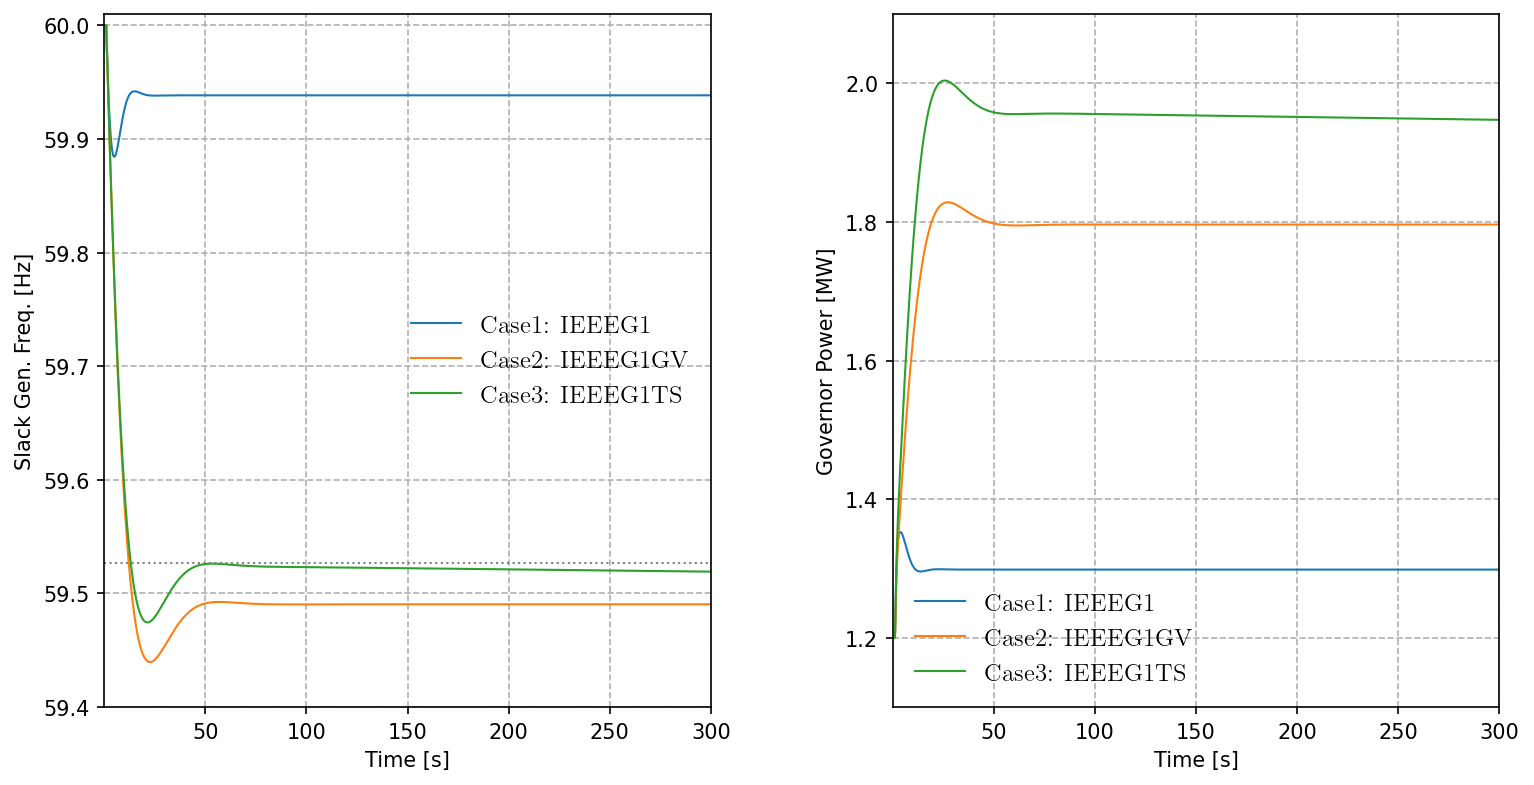

In [10]:
plt.style.use('default')
fig, ax = plt.subplots(1, 2, figsize=(12, 6), dpi=150)
plt.subplots_adjust(wspace=0.3)

fmin, fmax = 59.4, 60.01
a = (46,)
_ = s1.TDS.plt.plot(s1.GENROU.omega,
                    a=a,
                    ymin=fmin, ymax=fmax,
                    ytimes=s1.config.freq,
                    show=False, grid=True,
                    ylabel='Slack Gen. Freq. [Hz]',
                    yheader=['Case1: IEEEG1'],
                    fig=fig, ax=ax[0],)
_ = s2.TDS.plt.plot(s2.GENROU.omega,
                    a=a,
                    ytimes=s2.config.freq,
                    show=False,
                    yheader=['Case2: IEEEG1GV'],
                    fig=fig, ax=ax[0],)
_ = s3.TDS.plt.plot(s3.GENROU.omega,
                    a=a,
                    ytimes=s3.config.freq,
                    hline=[59.527],
                    show=False,
                    yheader=['Case3: IEEEG1TS'],
                    fig=fig, ax=ax[0],)

a = (0,)
tmin, tmax = 1.1, 2.1
_ = s1.TDS.plt.plot(s1.IEEEG1.pout,
                    a=a,
                    ytimes=s1.config.mva,
                    ymin=tmin, ymax=tmax,
                    show=False, grid=True,
                    ylabel='Governor Power [MW]',
                    yheader=['Case1: IEEEG1'],
                    fig=fig, ax=ax[1],)
_ = s2.TDS.plt.plot(s2.IEEEG1GV.pout,
                    a=a,
                    ytimes=s1.config.mva,
                    show=False,
                    yheader=['Case2: IEEEG1GV'],
                    fig=fig, ax=ax[1],)
_ = s3.TDS.plt.plot(s3.IEEEG1TS.pout,
                    a=a,
                    ytimes=s1.config.mva,
                    show=False,
                    yheader=['Case3: IEEEG1TS'],
                    fig=fig, ax=ax[1],)
                    